In [104]:
#Data Manipulation Libraries
import pandas as pd
import numpy as np
import psycopg2

#warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patheffects as path_effects
sns.set_palette("Set2")

#Statistics Libraries
import scipy.stats as stats
import scipy as sp
from scipy.stats import norm
import statsmodels.api as sm
import random
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statistics import mean, stdev
from scipy.stats import ttest_ind
from math import sqrt
import datetime as dt


#Machine Learning Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Maching Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

#Hyperparameter Tuning/Scoring
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
# read excel csv file into pandas

In [3]:
df = pd.read_csv('employee_salaries_dataset.csv')

In [4]:
# return first 5 rows of raw dataframe
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5/18/2014,1/7/2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,1/7/2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7/28/2014,1/7/2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,4/3/2013,1/7/2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11/20/2014,1/7/2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [5]:
# retreive raw data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [6]:
# check for null data
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

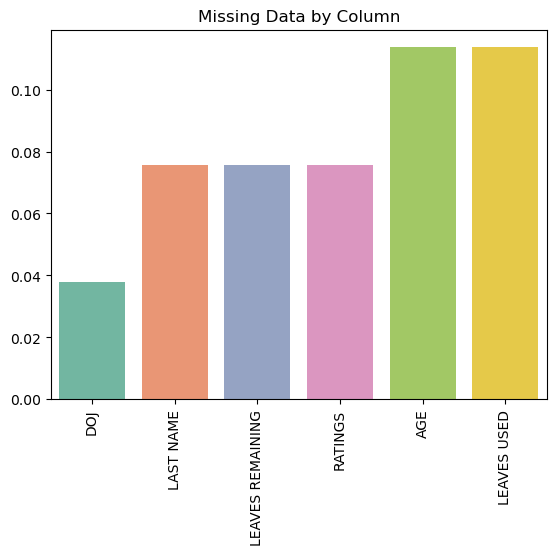

In [7]:
#function to count and plot missing values
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.title('Missing Data by Column')
plt.xticks(rotation=90);

In [8]:
# clean up column names
df.rename(columns={"FIRST NAME": "first_name", "LAST NAME": "last_name", "SEX":"sex", "DOJ":"join_date",
                  "CURRENT DATE":"todays_date", "DESIGNATION":"job_title","AGE":"age","SALARY":"salary","UNIT":"department",
                  "LEAVES USED":"leaves_used","LEAVES REMAINING":"leaves_remaining","RATINGS":"ratings","PAST EXP":"past_experience"},inplace=True)

In [9]:
df.head()

,first_name,last_name,sex,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience
0,TOMASA,ARMEN,F,5/18/2014,1/7/2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,1/7/2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7/28/2014,1/7/2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,4/3/2013,1/7/2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11/20/2014,1/7/2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [10]:
#clean names
df["first_name"] = df["first_name"].str.capitalize()
df["last_name"] = df["last_name"].str.capitalize()

In [11]:
#missing values
df.loc[df.join_date.isnull()]

,first_name,last_name,sex,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience
1,Annie,NaN,F,NaN,1/7/2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7


In [12]:
#fill empty join date
df['join_date'] = df['join_date'].fillna('12/31/2015')

In [13]:
df.loc[df.join_date.isnull()]

,first_name,last_name,sex,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience


In [14]:
df.loc[df.last_name.isnull()]

,first_name,last_name,sex,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience
1,Annie,NaN,F,12/31/2015,1/7/2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
5,Victoria,NaN,F,2/19/2013,1/7/2016,Analyst,22.0,48736,Marketing,20.0,10.0,4.0,0


In [15]:
#fake last name, needs verification on duplicates, fine for now
df['last_name'] = np.where(df['last_name'].isna(), 'NULL' , df['last_name'])

In [16]:
df.head()

,first_name,last_name,sex,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience
0,Tomasa,Armen,F,5/18/2014,1/7/2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,Annie,NULL,F,12/31/2015,1/7/2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,Olive,Ancy,F,7/28/2014,1/7/2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,Cherry,Aquilar,F,4/3/2013,1/7/2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,Leon,Aboulahoud,M,11/20/2014,1/7/2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [17]:
df.loc[(df.first_name == 'Annie') & (df.last_name == 'NULL')]

,first_name,last_name,sex,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience
1,Annie,NULL,F,12/31/2015,1/7/2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7


In [18]:
df['fullname'] = df['first_name'] + ', ' + df['last_name']

In [19]:
#empty leave days, 30 appears to be max, caluclate difference and apply
df['leaves_remaining_check'] = 30 - df['leaves_used']
df['leaves_used_check'] = 30 - df['leaves_remaining']

In [20]:
df.loc[df.leaves_remaining.isnull()]

,first_name,last_name,sex,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience,fullname,leaves_remaining_check,leaves_used_check
15,Corinne,Andrzejczyk,F,8/13/2014,1/7/2016,Analyst,21.0,44812,IT,16.0,NaN,5.0,0,"Corinne, Andrzejczyk",14.0,NaN
23,Wendi,Appert,F,12/2/2013,1/7/2016,Analyst,25.0,43920,Web,28.0,NaN,2.0,2,"Wendi, Appert",2.0,NaN


In [21]:
df['leaves_remaining'] = np.where(df['leaves_remaining'].isna(), df['leaves_remaining_check'], df['leaves_remaining'])

In [22]:
df.loc[df.leaves_used.isnull()]

,first_name,last_name,sex,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience,fullname,leaves_remaining_check,leaves_used_check
1,Annie,NULL,F,12/31/2015,1/7/2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7,"Annie, NULL",NaN,17.0
11,Virgil,Ackies,M,2/1/2010,1/7/2016,Senior Manager,36.0,160613,Finance,NaN,11.0,2.0,9,"Virgil, Ackies",NaN,19.0
19,Phillip,Abdula,M,7/3/2013,1/7/2016,Analyst,24.0,44665,Web,NaN,12.0,5.0,0,"Phillip, Abdula",NaN,18.0


In [23]:
df['leaves_used'] = np.where(df['leaves_used'].isna(), df['leaves_used_check'], df['leaves_used'])

In [24]:
df.drop(['leaves_remaining_check','leaves_used_check'], axis=1, inplace=True)

In [25]:
df.loc[df.ratings.isnull()]

,first_name,last_name,sex,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience,fullname
1,Annie,NULL,F,12/31/2015,1/7/2016,Associate,NaN,89207,Web,17.0,13.0,NaN,7,"Annie, NULL"
4,Leon,Aboulahoud,M,11/20/2014,1/7/2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,"Leon, Aboulahoud"


In [26]:
df['ratings'] = df['ratings'].fillna(0)

In [27]:
df.loc[df.age.isnull()]

,first_name,last_name,sex,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience,fullname
1,Annie,NULL,F,12/31/2015,1/7/2016,Associate,NaN,89207,Web,17.0,13.0,0.0,7,"Annie, NULL"
4,Leon,Aboulahoud,M,11/20/2014,1/7/2016,Analyst,NaN,43161,Operations,27.0,3.0,0.0,3,"Leon, Aboulahoud"
7,Jacques,Akmal,M,12/5/2013,1/7/2016,Analyst,NaN,40058,Marketing,29.0,1.0,2.0,2,"Jacques, Akmal"


In [28]:
#fill empty ages with average per job title and department to normalize
df.groupby(['job_title','department']).age.mean()

job_title       department
Analyst         Finance       23.040881
                IT            23.019943
                Management    23.022876
                Marketing     22.945513
                Operations    23.065476
                Web           22.969136
Associate       Finance       30.038462
                IT            30.166667
                Management    30.000000
                Marketing     30.285714
                Operations    29.440000
                Web           29.851852
Director        Finance       42.750000
                IT            41.375000
                Management    42.400000
                Marketing     40.400000
                Operations    41.000000
                Web           42.142857
Manager         Finance       33.450000
                IT            32.769231
                Management    33.214286
                Marketing     33.500000
                Operations    33.400000
                Web           33.416667
Senior Analys

In [29]:
df['age'] = df.groupby(['job_title','department']).age.transform(lambda val: val.fillna(val.mean()))

In [30]:
#Matches average age of Associate in Web department
df.loc[(df.first_name == 'Annie') &(df.last_name == 'NULL')]

,first_name,last_name,sex,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience,fullname
1,Annie,NULL,F,12/31/2015,1/7/2016,Associate,29.851852,89207,Web,17.0,13.0,0.0,7,"Annie, NULL"


In [31]:
#good
df.isnull().sum()

first_name          0
last_name           0
sex                 0
join_date           0
todays_date         0
job_title           0
age                 0
salary              0
department          0
leaves_used         0
leaves_remaining    0
ratings             0
past_experience     0
fullname            0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   first_name        2639 non-null   object 
 1   last_name         2639 non-null   object 
 2   sex               2639 non-null   object 
 3   join_date         2639 non-null   object 
 4   todays_date       2639 non-null   object 
 5   job_title         2639 non-null   object 
 6   age               2639 non-null   float64
 7   salary            2639 non-null   int64  
 8   department        2639 non-null   object 
 9   leaves_used       2639 non-null   float64
 10  leaves_remaining  2639 non-null   float64
 11  ratings           2639 non-null   float64
 12  past_experience   2639 non-null   int64  
 13  fullname          2639 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 288.8+ KB


In [33]:
#change date data types and create usefull columns
df['join_date'] = pd.to_datetime(df['join_date'])
df['todays_date'] = pd.to_datetime(df['todays_date'])

df['join_year'] = df['join_date'].dt.year
df['join_month'] = df['join_date'].dt.month

In [34]:
#calculate tenure column
df['tenure'] = (df['todays_date'] - df['join_date']).dt.days // 365.25

In [35]:
#check for duplicates
df[df.duplicated(['fullname','join_date','job_title','age'])]

,first_name,last_name,sex,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience,fullname,join_year,join_month,tenure
104,Cari,Arenales,F,2014-04-10,2016-01-07,Senior Analyst,28.0,66338,Web,24.0,6.0,3.0,5,"Cari, Arenales",2014,4,1.0
248,Bobbie,Aidt,M,2013-06-29,2016-01-07,Senior Analyst,25.0,68505,Operations,15.0,15.0,3.0,1,"Bobbie, Aidt",2013,6,2.0
400,Juan,Abbassi,M,2013-07-01,2016-01-07,Senior Analyst,27.0,61575,Finance,20.0,10.0,2.0,1,"Juan, Abbassi",2013,7,2.0
422,Jodie,Aniello,F,2014-10-29,2016-01-07,Analyst,24.0,43137,IT,27.0,3.0,2.0,2,"Jodie, Aniello",2014,10,1.0
446,Alex,Abolafia,M,2013-11-10,2016-01-07,Analyst,25.0,43352,Finance,27.0,3.0,4.0,2,"Alex, Abolafia",2013,11,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,Romeo,Ainsley,M,2014-11-20,2016-01-07,Analyst,23.0,41052,IT,15.0,15.0,5.0,1,"Romeo, Ainsley",2014,11,1.0
2591,Royce,Agosto,M,2014-06-07,2016-01-07,Analyst,24.0,48651,Web,27.0,3.0,5.0,1,"Royce, Agosto",2014,6,1.0
2600,Sheree,Appel,F,2013-09-24,2016-01-07,Analyst,25.0,49559,Management,22.0,8.0,5.0,2,"Sheree, Appel",2013,9,2.0
2624,Jospeh,Allis,M,2014-02-26,2016-01-07,Analyst,22.0,45364,Web,20.0,10.0,2.0,0,"Jospeh, Allis",2014,2,1.0


In [36]:
#verification 1
df.loc[df.fullname == 'Cari, Arenales']

,first_name,last_name,sex,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience,fullname,join_year,join_month,tenure
53,Cari,Arenales,F,2014-04-10,2016-01-07,Senior Analyst,28.0,66338,Web,24.0,6.0,3.0,5,"Cari, Arenales",2014,4,1.0
104,Cari,Arenales,F,2014-04-10,2016-01-07,Senior Analyst,28.0,66338,Web,24.0,6.0,3.0,5,"Cari, Arenales",2014,4,1.0


In [37]:
#verification 2
df.loc[df.fullname == 'Jodie, Aniello']

,first_name,last_name,sex,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience,fullname,join_year,join_month,tenure
207,Jodie,Aniello,F,2014-10-29,2016-01-07,Analyst,24.0,43137,IT,27.0,3.0,2.0,2,"Jodie, Aniello",2014,10,1.0
422,Jodie,Aniello,F,2014-10-29,2016-01-07,Analyst,24.0,43137,IT,27.0,3.0,2.0,2,"Jodie, Aniello",2014,10,1.0


In [38]:
#drop unique duplicates
df.drop_duplicates(subset=['fullname','join_date','job_title','age'], keep='first',inplace = True)

In [39]:
#161 were removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2478 entries, 0 to 2638
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   first_name        2478 non-null   object        
 1   last_name         2478 non-null   object        
 2   sex               2478 non-null   object        
 3   join_date         2478 non-null   datetime64[ns]
 4   todays_date       2478 non-null   datetime64[ns]
 5   job_title         2478 non-null   object        
 6   age               2478 non-null   float64       
 7   salary            2478 non-null   int64         
 8   department        2478 non-null   object        
 9   leaves_used       2478 non-null   float64       
 10  leaves_remaining  2478 non-null   float64       
 11  ratings           2478 non-null   float64       
 12  past_experience   2478 non-null   int64         
 13  fullname          2478 non-null   object        
 14  join_year         2478 n

In [40]:
#relabel gender column
def gender(col):
    if col == 'M':
        return 'Male'
    elif col == 'F':
        return 'Female'
    else:
        return 'NA'
    
df['gender'] = np.vectorize(gender)(df['sex'])

In [41]:
df.drop('sex', axis = 1, inplace = True)

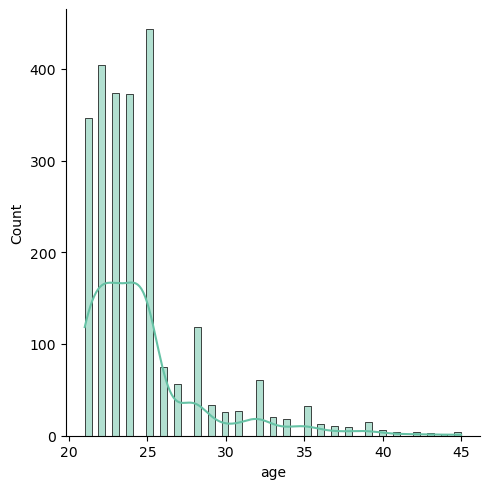

In [42]:
#create age bins and analyze values
sns.displot(df,x='age',kde=True)

In [43]:
#age binning
df['Age_Band'] = pd.cut(df['age'], [20.99, 24, 30,99], labels=['21-24', '24-30', '30+'])

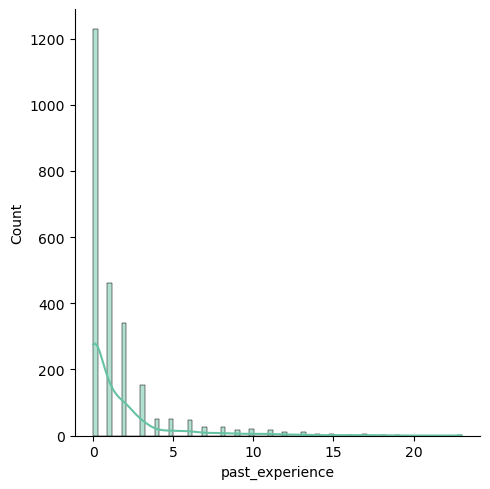

In [44]:
#create experience bins and analyze values
sns.displot(df,x='past_experience',kde=True)

In [45]:
#tenure binning
df['Age_Band'] = pd.cut(df['age'], [20.99, 24, 30,99], labels=['21-24', '24-30', '30+'])

In [46]:
df['Exp_Band'] = pd.cut(df['past_experience'], [-1, 0.99,2 ,3,4,99], labels=['0-1', '1-2','2-3','3-4', '4+'])

In [47]:
df.Age_Band.value_counts()

21-24    1497
24-30     751
30+       230
Name: Age_Band, dtype: int64

In [48]:
df.Age_Band.value_counts(normalize=True)

21-24    0.604116
24-30    0.303067
30+      0.092817
Name: Age_Band, dtype: float64

In [49]:
df

,first_name,last_name,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience,fullname,join_year,join_month,tenure,gender,Age_Band,Exp_Band
0,Tomasa,Armen,2014-05-18,2016-01-07,Analyst,21.000000,44570,Finance,24.0,6.0,2.0,0,"Tomasa, Armen",2014,5,1.0,Female,21-24,0-1
1,Annie,NULL,2015-12-31,2016-01-07,Associate,29.851852,89207,Web,17.0,13.0,0.0,7,"Annie, NULL",2015,12,0.0,Female,24-30,4+
2,Olive,Ancy,2014-07-28,2016-01-07,Analyst,21.000000,40955,Finance,23.0,7.0,3.0,0,"Olive, Ancy",2014,7,1.0,Female,21-24,0-1
3,Cherry,Aquilar,2013-04-03,2016-01-07,Analyst,22.000000,45550,IT,22.0,8.0,3.0,0,"Cherry, Aquilar",2013,4,2.0,Female,21-24,0-1
4,Leon,Aboulahoud,2014-11-20,2016-01-07,Analyst,23.065476,43161,Operations,27.0,3.0,0.0,3,"Leon, Aboulahoud",2014,11,1.0,Male,21-24,2-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,Katherine,Alsdon,2011-06-28,2016-01-07,Senior Manager,36.000000,185977,Management,15.0,15.0,5.0,10,"Katherine, Alsdon",2011,6,4.0,Female,30+,4+
2635,Louise,Altaras,2014-01-14,2016-01-07,Analyst,23.000000,45758,IT,17.0,13.0,2.0,0,"Louise, Altaras",2014,1,1.0,Female,21-24,0-1
2636,Renee,Alvino,2014-01-23,2016-01-07,Analyst,21.000000,47315,Web,29.0,1.0,5.0,0,"Renee, Alvino",2014,1,1.0,Female,21-24,0-1
2637,Teri,Anastasio,2014-03-17,2016-01-07,Analyst,24.000000,45172,Web,23.0,7.0,3.0,1,"Teri, Anastasio",2014,3,1.0,Female,21-24,1-2


In [50]:
#visualize distribution for salary column prior to searching for drivers.  is it normally distributed?
#appears to be right skewed 

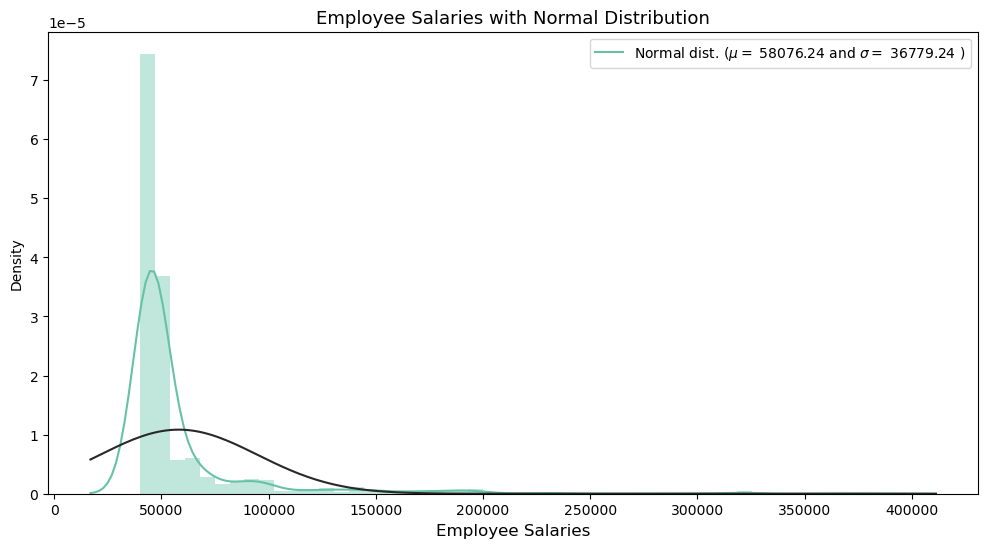

Skewness: 4.465844
Kurtosis: 24.908900
Shapiro_Test: 0.460079
Shapiro_Test: 0.000000


In [51]:
(mu, sigma) = norm.fit(df['salary'])
plt.figure(figsize = (12,6))
sns.distplot(df['salary'], kde = True, hist=True, fit = norm)
plt.title('Employee Salaries with Normal Distribution', fontsize = 13)
plt.xlabel("Employee Salaries", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show()

shap_t,shap_p = stats.shapiro(df['salary'])

print("Skewness: %f" % abs(df['salary']).skew())
print("Kurtosis: %f" % abs(df['salary']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

In [52]:
#outliers on individual columns
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            print(i)
    #return outliers

In [53]:
#might be influenced by management positions.  not real outliars to remove if confirmed
detect_outliers(df['salary'])

175497
193621
189435
323196
388112
284733
186356
313649
191793
375647
235565
199577
324783
198814
169300
313938
184143
253284
185221
319141
196757
187426
171056
177412
181470
319742
190618
189307
197246
319407
179845
185205
199060
234374
294564
176158
196857
192623
180778
172445
182134
366063
225339
195984
213987
197526
178590
193319
190626
301872
197900
236901
170971
225412
176567
190414
355337
170611
190850
270193
320148
232682
218098
177587
324129
368887
195985
187837
194701
185977


In [54]:
#confirmed
df.loc[df.salary > 168000].job_title.value_counts()

Senior Manager    43
Director          27
Name: job_title, dtype: int64

In [55]:
#Begin Plotting for Exploratory Data Analysis

<Axes: title={'center': 'Correlation Matrix to Dataset Features'}>

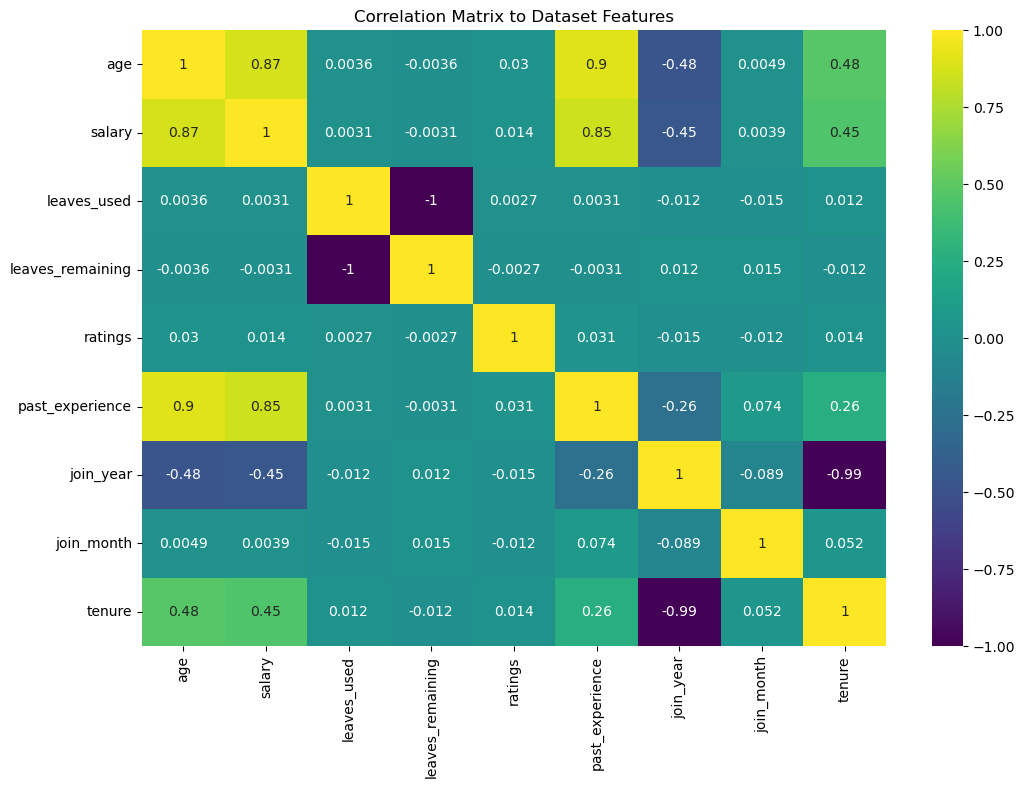

In [56]:
plt.figure(figsize=(12,8))
plt.title('Correlation Matrix to Dataset Features')
sns.heatmap(df.corr(),cmap='viridis',annot=True)

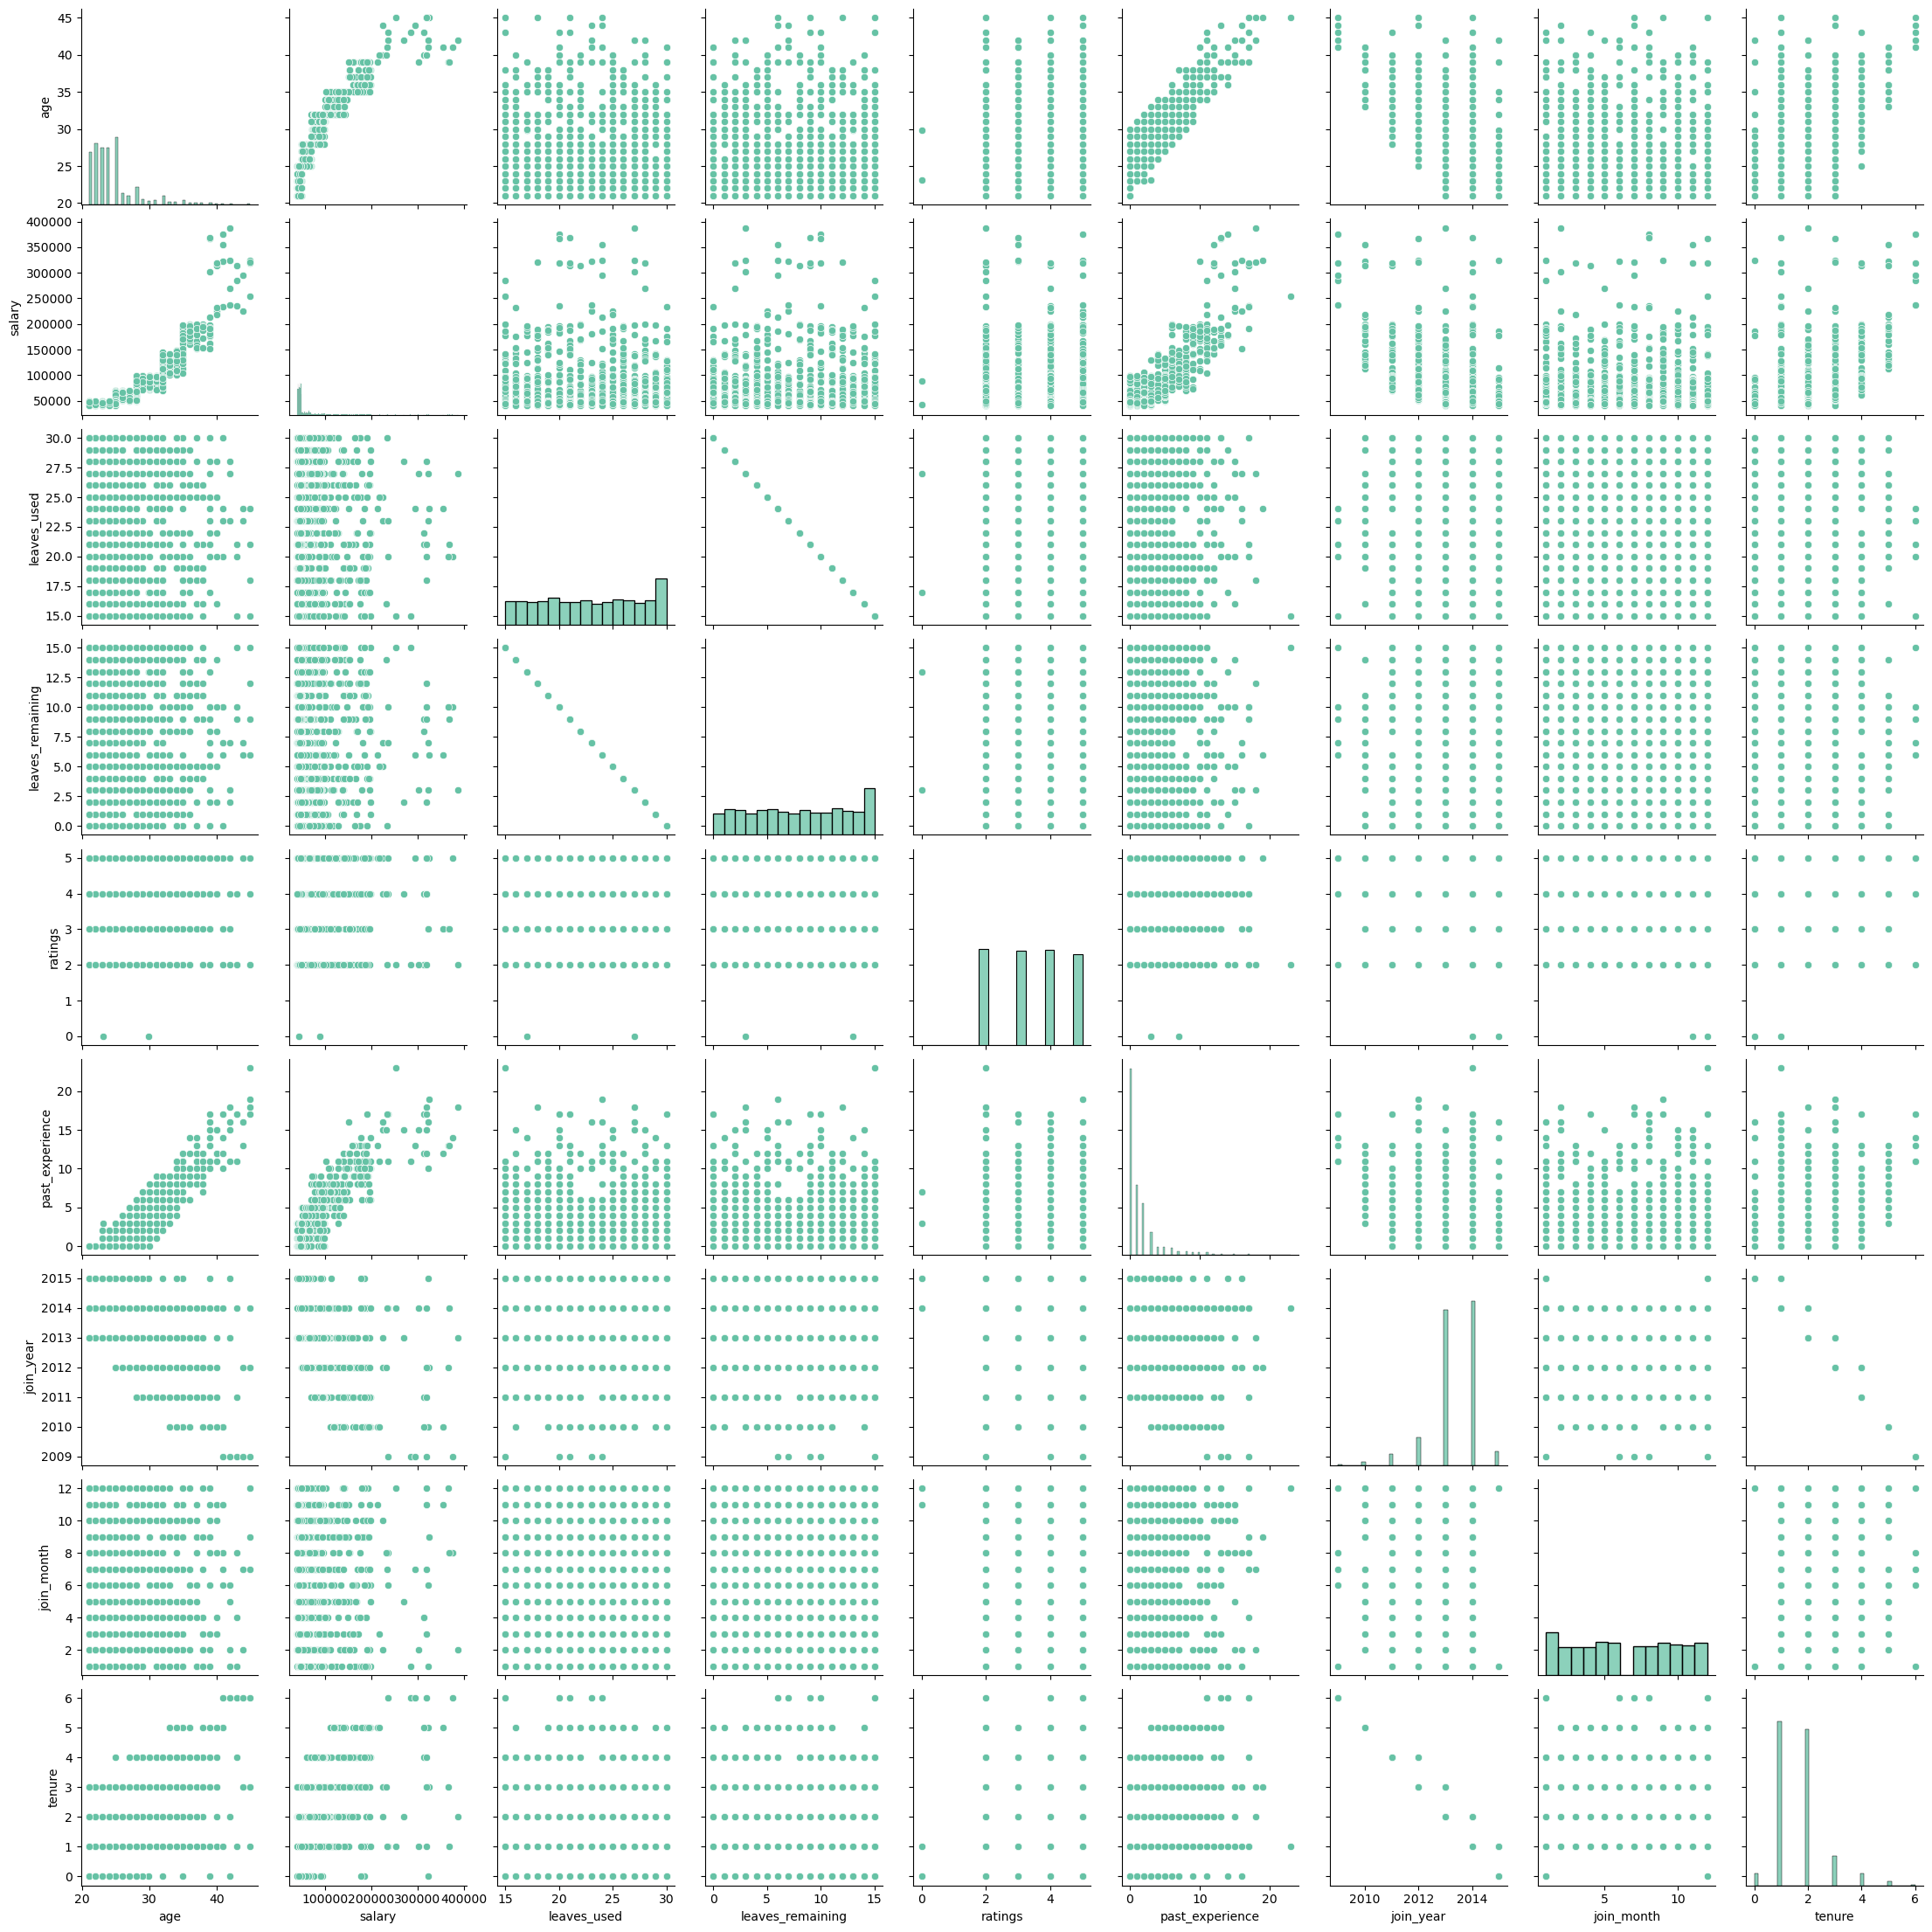

In [57]:
sns.pairplot(df)

In [58]:
df.corr()['salary'].sort_values(ascending = False)

salary              1.000000
age                 0.869712
past_experience     0.851059
tenure              0.452389
ratings             0.013981
join_month          0.003908
leaves_used         0.003095
leaves_remaining   -0.003095
join_year          -0.454332
Name: salary, dtype: float64

In [59]:
df.describe()

,age,salary,leaves_used,leaves_remaining,ratings,past_experience,join_year,join_month,tenure
count,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000
mean,24.727951,58076.235270,22.488297,7.511703,3.479015,1.560129,2013.338579,6.399919,1.682405
std,3.911883,36786.661873,4.598764,4.598764,1.119867,2.706363,0.881087,3.534859,0.882489
min,21.000000,40001.000000,15.000000,0.000000,0.000000,0.000000,2009.000000,1.000000,0.000000
25%,22.000000,43401.250000,19.000000,4.000000,2.000000,0.000000,2013.000000,3.000000,1.000000
50%,24.000000,46733.500000,22.000000,8.000000,3.000000,1.000000,2013.000000,6.000000,2.000000
75%,25.000000,50323.750000,26.000000,11.000000,4.000000,2.000000,2014.000000,9.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000,2015.000000,12.000000,6.000000


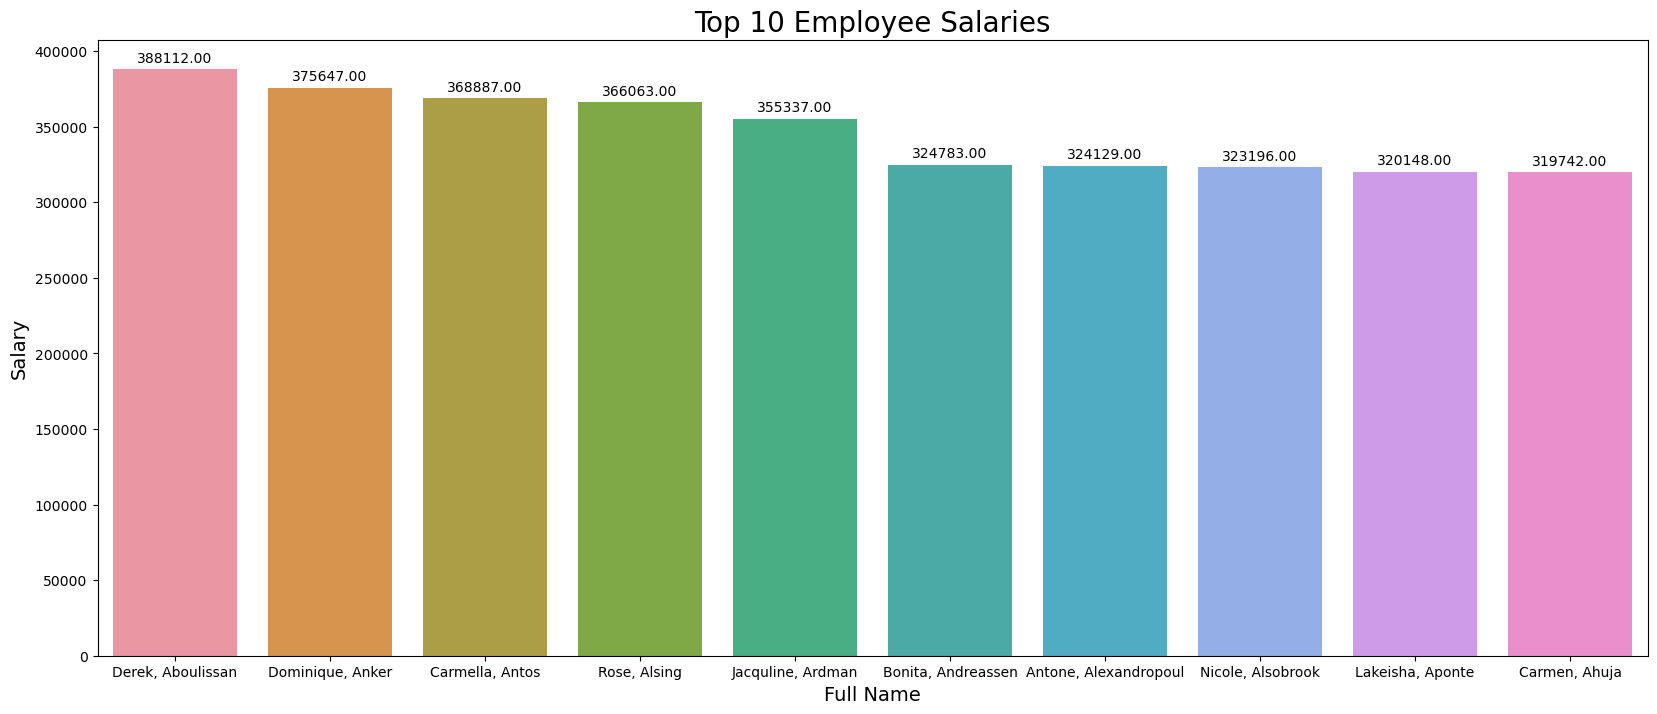

In [60]:
top_salaries_df = df.sort_values(by = 'salary',ascending = False).head(10)

plt.figure(figsize=(20, 8))
plots = sns.barplot(x="fullname", y="salary", data=top_salaries_df )

for bar in plots.patches:
  
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(fontsize=10)

plt.xlabel("Full Name", size=14)

plt.ylabel("Salary", size=14)

plt.title("Top 10 Employee Salaries",fontsize=20)


plt.show()

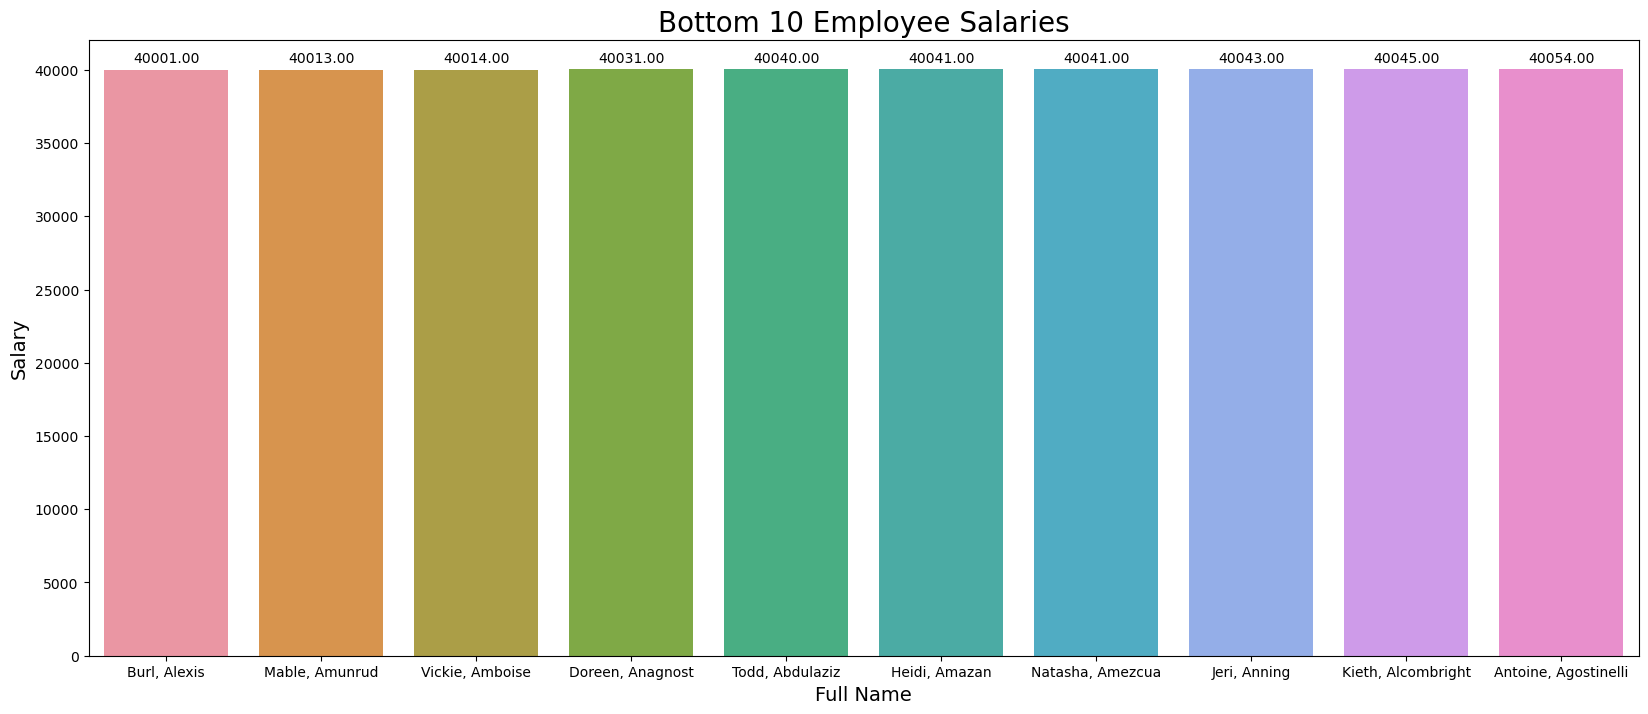

In [61]:
bottom_salaries_df = df.sort_values(by = 'salary',ascending = True).head(10)
plt.figure(figsize=(20, 8))
plots = sns.barplot(x="fullname", y="salary", data=bottom_salaries_df )

for bar in plots.patches:
  
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(fontsize=10)

plt.xlabel("Full Name", size=14)

plt.ylabel("Salary", size=14)

plt.title("Bottom 10 Employee Salaries",fontsize=20)


plt.show()

Text(29.0, 0.5, 'Salary')

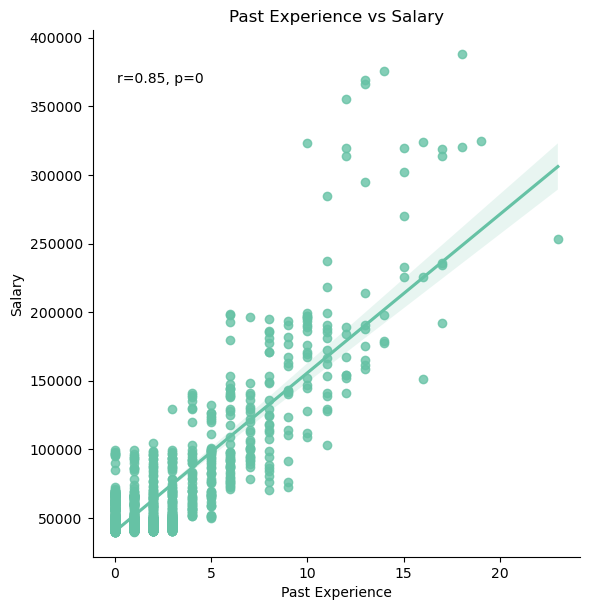

In [62]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['past_experience'], data['salary'])
    ax = plt.gca()
    ax.text(.05, 0.9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
g = sns.lmplot(x='past_experience', y='salary', data=df, height=6, aspect=1)
g.map_dataframe(annotate)
plt.title('Past Experience vs Salary')
plt.xlabel('Past Experience')
plt.ylabel('Salary')

Text(29.0, 0.5, 'Salary')

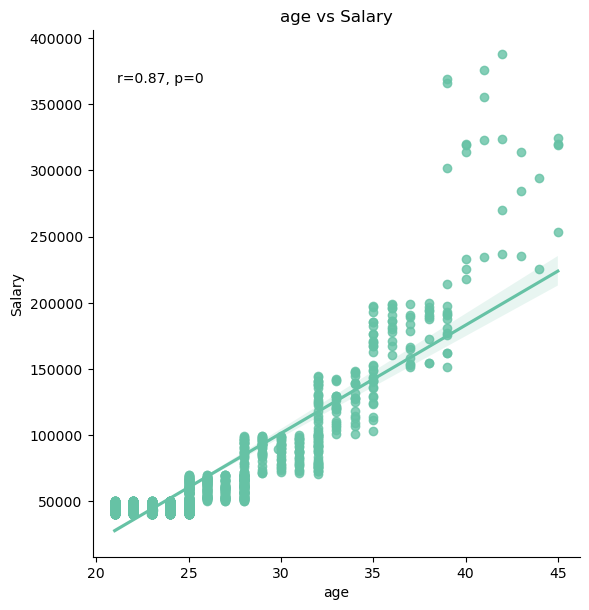

In [63]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['age'], data['salary'])
    ax = plt.gca()
    ax.text(.05, 0.9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
g = sns.lmplot(x='age', y='salary', data=df, height=6, aspect=1)
g.map_dataframe(annotate)
plt.title('age vs Salary')
plt.xlabel('age')
plt.ylabel('Salary')

In [64]:
#boxplot with median labels

plt.figure(figsize=(12,6))

#stackoverflow reference https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value

def add_median_labels(ax: plt.Axes, fmt: str = ".1f") -> None:
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if "Patch" in str(c)]
    start = 4
    if not boxes:  # seaborn v0.13 => fill=False => no patches => +1 line
        boxes = [c for c in ax.get_lines() if len(c.get_xdata()) == 5]
        start += 1
    lines_per_box = len(lines) // len(boxes)
    for median in lines[start::lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if len(set(median.get_xdata())) == 1 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

<Figure size 1200x600 with 0 Axes>

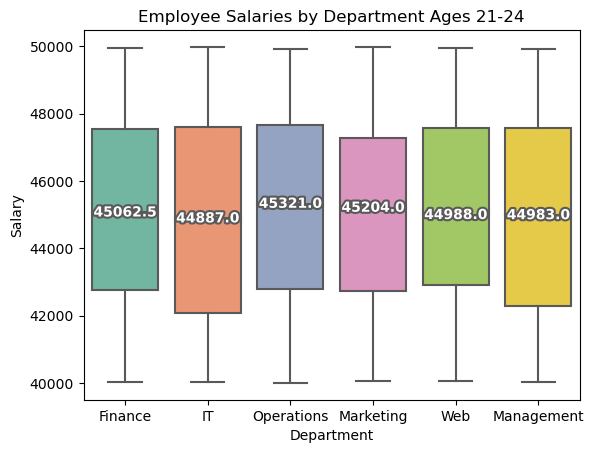

In [65]:
ax = sns.boxplot(x='department',y='salary',data = df.loc[df.Age_Band == '21-24'])
add_median_labels(ax)
plt.title('Employee Salaries by Department Ages 21-24')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.show()

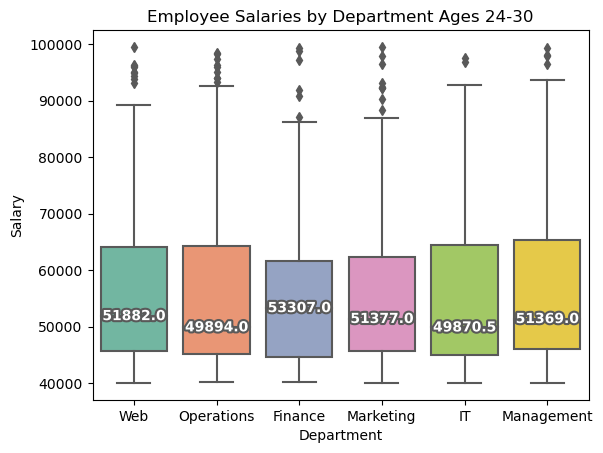

In [66]:
ax = sns.boxplot(x='department',y='salary',data = df.loc[df.Age_Band == '24-30'])
add_median_labels(ax)
plt.title('Employee Salaries by Department Ages 24-30')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.show()

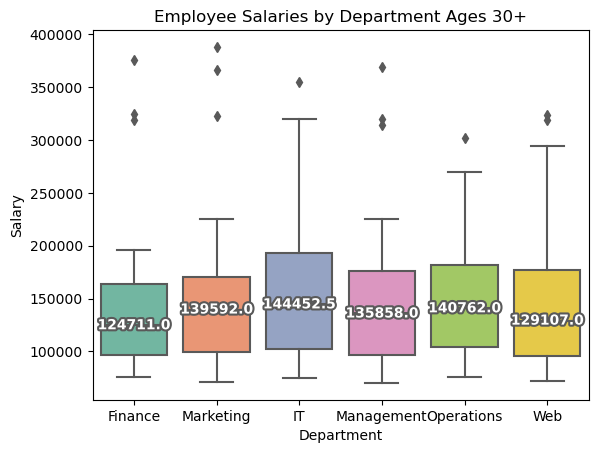

In [67]:
ax = sns.boxplot(x='department',y='salary',data = df.loc[df.Age_Band == '30+'])
add_median_labels(ax)
plt.title('Employee Salaries by Department Ages 30+')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.show()

In [68]:
df.groupby('department').salary.mean()

department
Finance       58376.647482
IT            59149.832952
Management    59063.949622
Marketing     59140.591241
Operations    55520.218750
Web           57174.475000
Name: salary, dtype: float64

In [69]:
Finance = df.loc[df.department == 'Finance']['salary']
IT = df.loc[df.department == 'IT']['salary']
Management = df.loc[df.department == 'Management']['salary']
Marketing = df.loc[df.department == 'Marketing']['salary']
Operations = df.loc[df.department == 'Operations']['salary']
Web = df.loc[df.department == 'Web']['salary']

anova = stats.f_oneway(Finance,IT,Management,Marketing,Operations,Web)

result = pairwise_tukeyhsd(endog = df['salary'], groups = df['department'], alpha = 0.05)
print(result)
print(anova)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1     group2    meandiff  p-adj     lower      upper   reject
--------------------------------------------------------------------
   Finance         IT   773.1855 0.9996  -6411.4227 7957.7937  False
   Finance Management   687.3021 0.9998  -6671.9185 8046.5227  False
   Finance  Marketing   763.9438 0.9997  -6530.7847 8058.6722  False
   Finance Operations -2856.4287 0.8732 -10129.0456 4416.1881  False
   Finance        Web -1202.1725 0.9972  -8547.2419 6142.8969  False
        IT Management   -85.8833    1.0  -7362.5076  7190.741  False
        IT  Marketing    -9.2417    1.0  -7220.6352 7202.1518  False
        IT Operations -3629.6142 0.7025 -10818.6398 3559.4114  False
        IT        Web  -1975.358 0.9716  -9237.6701 5286.9542  False
Management  Marketing    76.6416    1.0  -7308.7311 7462.0143  False
Management Operations -3543.7309 0.7436 -10907.2641 3819.8024  False
Management        Web -1889.4746  

Ttest_indResult(statistic=-1.2617097620390065, pvalue=0.2071744930213503)
-0.05062725083174623
LeveneResult(statistic=1.5178162398835338, pvalue=0.21806724454940132)


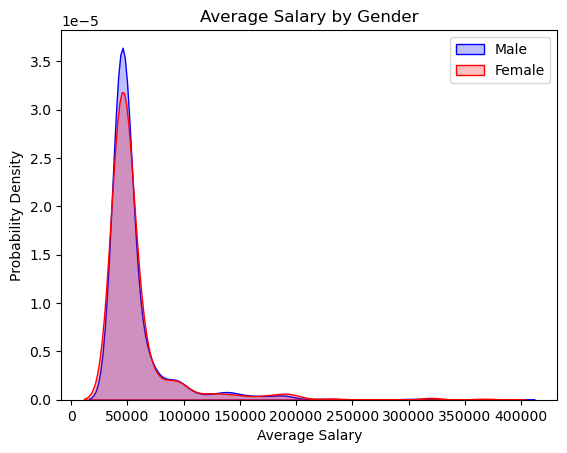

In [70]:
sns.kdeplot(df.loc[(df['gender']=='Male'),'salary'], color='b', fill=True, label='Male')
 
sns.kdeplot(df.loc[(df['gender']=='Female'),'salary'], color='r', fill=True, label='Female')
 
plt.xlabel('Average Salary')
plt.ylabel('Probability Density')
plt.title('Average Salary by Gender')
plt.legend()


group1 = df[df['gender']=='Male']
group2 = df[df['gender']=='Female']

print(ttest_ind(group1['salary'], group2['salary'], equal_var = False))

# test conditions
c0 = df[df['gender']=='Male']['salary']
c1 = df[df['gender']=='Female']['salary']

cohens_d = (mean(c0) - mean(c1)) / (sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2))

print(cohens_d)
print(stats.levene(c0,c1))

In [71]:
df.groupby(['department','gender']).salary.mean().reset_index()

,department,gender,salary
0,Finance,Female,59731.059908
1,Finance,Male,56907.110000
2,IT,Female,58782.264151
3,IT,Male,59496.164444
4,Management,Female,60204.825871
5,Management,Male,57893.969388
6,Marketing,Female,61011.847291
7,Marketing,Male,57314.317308
8,Operations,Female,56779.179245
9,Operations,Male,54211.887255


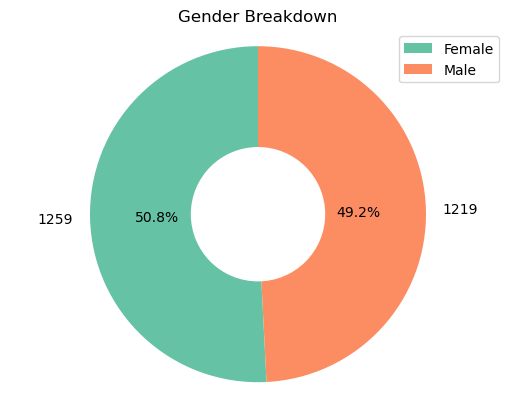

In [72]:
fig, ax = plt.subplots()
d = df["gender"].value_counts()
ax.pie(d,autopct='%1.1f%%', startangle=90,labels=d.values)
ax.legend(d.index)
ax.set_title("Gender Breakdown")
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal');

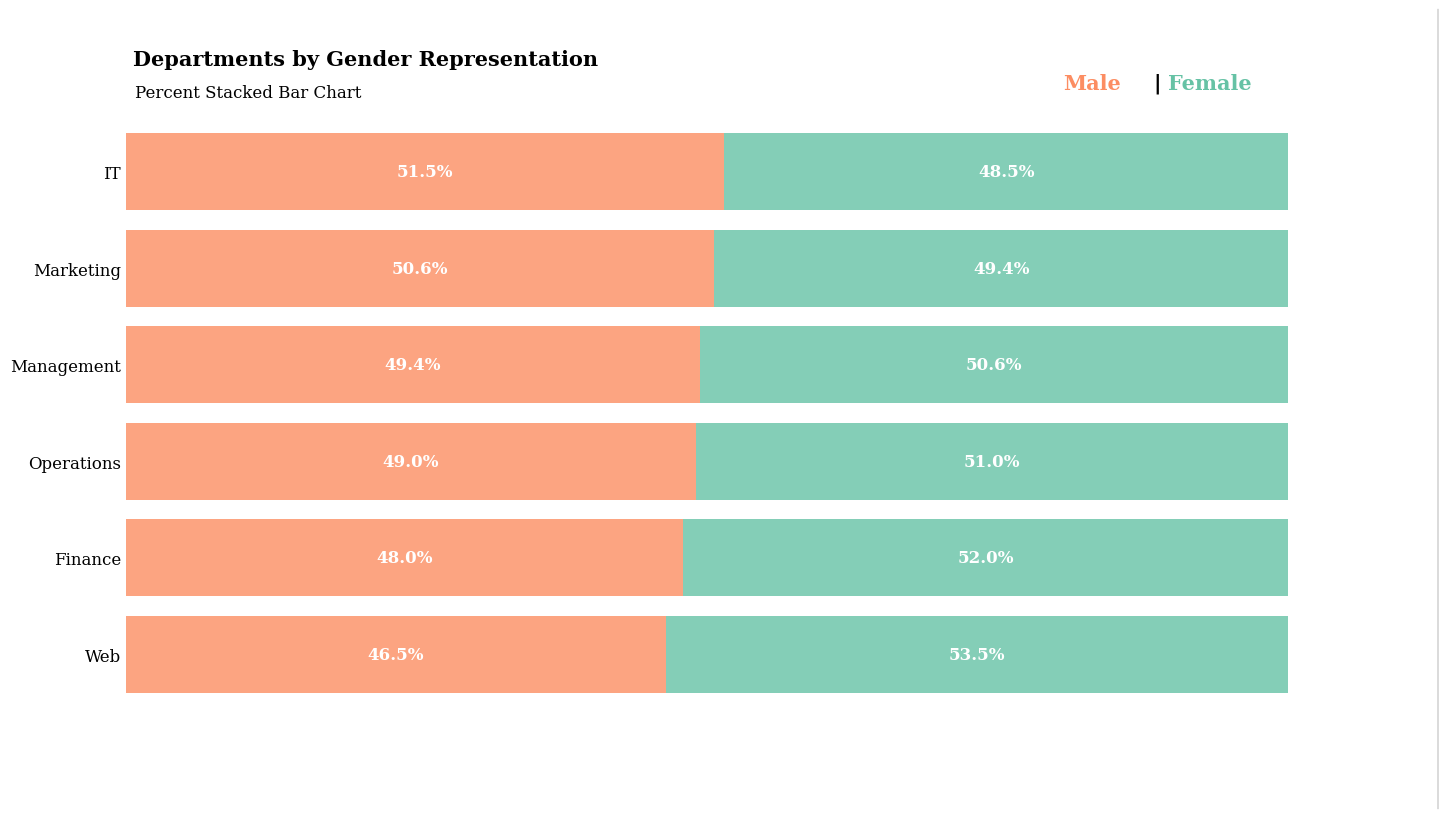

In [73]:
dep_order = df['department'].value_counts()[:11].index
data_q2q3 = df[['gender', 'department']].groupby('department')['gender'].value_counts().unstack().loc[dep_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Male', 'Female']].sort_values(by='Male',ascending=False)[::-1]


fig, ax = plt.subplots(1,1,figsize=(15, 8),)
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Male'], alpha=0.8, label='Male', color = '#fc8d62')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Female'], left=data_q2q3_ratio['Male'],alpha=0.8, label='Female',color ='#66c2a5')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Male'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Male'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='bold', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Female'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Male'][i]+data_q2q3_ratio['Female'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='bold', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Departments by Gender Representation', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

fig.text(0.75,0.9,"Male", fontweight="bold", fontfamily='serif', fontsize=15,color = '#fc8d62') 
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15)
fig.text(0.82,0.9,"Female", fontweight="bold", fontfamily='serif', fontsize=15,color = '#66c2a5') 



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

Text(95.72222222222221, 0.5, 'Age')

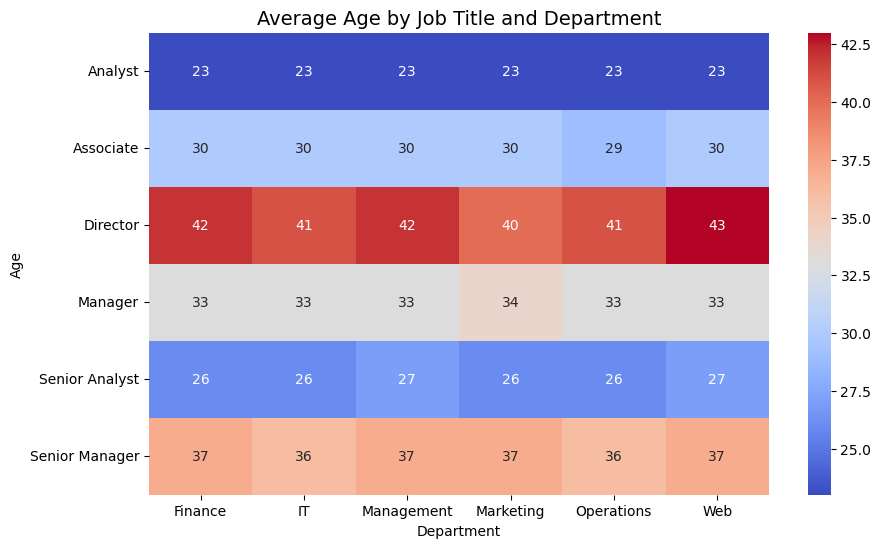

In [74]:
pivot_table = df.pivot_table(values='age', index='job_title', columns='department', aggfunc='mean').round()

plt.figure(figsize=(10, 6))
ax = sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='g')
ax.set_facecolor('lightgrey') 
plt.title('Average Age by Job Title and Department', fontsize=14)
plt.xlabel('Department', fontsize=10)
plt.ylabel('Age', fontsize=10)


In [75]:
stacked_bar_df = df.groupby(['department','Age_Band']).fullname.count().unstack(1).reset_index()
stacked_bar_df.set_index('department', inplace=True)
stacked_bar_df

Age_Band,21-24,24-30,30+
department,,,
Finance,244,130,43
IT,273,120,44
Management,239,117,41
Marketing,238,131,42
Operations,256,133,27
Web,247,120,33


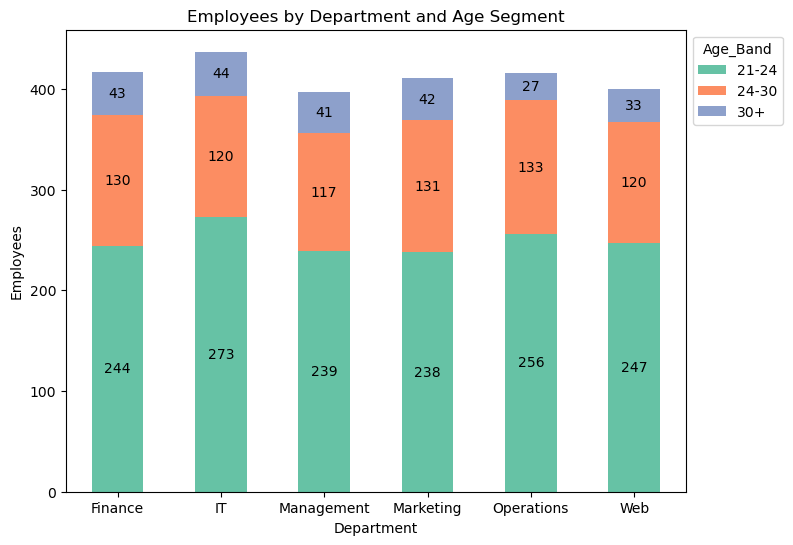

In [76]:

ax = stacked_bar_df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, xlabel='Department', ylabel='Employees')
plt.title('Employees by Department and Age Segment')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
for c in ax.containers:

    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, fmt='%0.0f', label_type='center')

In [77]:
df['department'].value_counts()[:11].index

Index(['IT', 'Finance', 'Operations', 'Marketing', 'Web', 'Management'], dtype='object')

In [78]:
pal = sns.color_palette("Set2")
pal.as_hex()[:]

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

In [79]:
df.groupby(['department','gender']).fullname.count()

department  gender
Finance     Female    217
            Male      200
IT          Female    212
            Male      225
Management  Female    201
            Male      196
Marketing   Female    203
            Male      208
Operations  Female    212
            Male      204
Web         Female    214
            Male      186
Name: fullname, dtype: int64

In [80]:
df['join_year'] = df['join_date'].dt.year
df['join_month'] = df['join_date'].dt.month

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2478 entries, 0 to 2638
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   first_name        2478 non-null   object        
 1   last_name         2478 non-null   object        
 2   join_date         2478 non-null   datetime64[ns]
 3   todays_date       2478 non-null   datetime64[ns]
 4   job_title         2478 non-null   object        
 5   age               2478 non-null   float64       
 6   salary            2478 non-null   int64         
 7   department        2478 non-null   object        
 8   leaves_used       2478 non-null   float64       
 9   leaves_remaining  2478 non-null   float64       
 10  ratings           2478 non-null   float64       
 11  past_experience   2478 non-null   int64         
 12  fullname          2478 non-null   object        
 13  join_year         2478 non-null   int64         
 14  join_month        2478 n

In [82]:
df.groupby('join_year').fullname.count()

join_year
2009       5
2010      24
2011      72
2012     184
2013    1024
2014    1079
2015      90
Name: fullname, dtype: int64

Text(95.72222222222221, 0.5, 'Department')

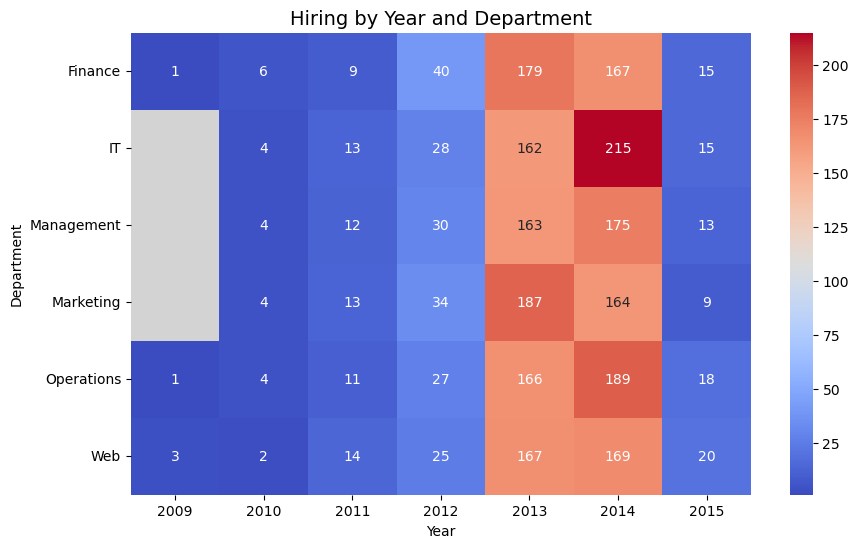

In [83]:
pivot_table = df.pivot_table(values='fullname', index='department', columns='join_year', aggfunc='count').round()

plt.figure(figsize=(10, 6))
ax = sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='g')
ax.set_facecolor('lightgrey') 
plt.title('Hiring by Year and Department', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Department', fontsize=10)

Text(0.5, 0, 'Year')

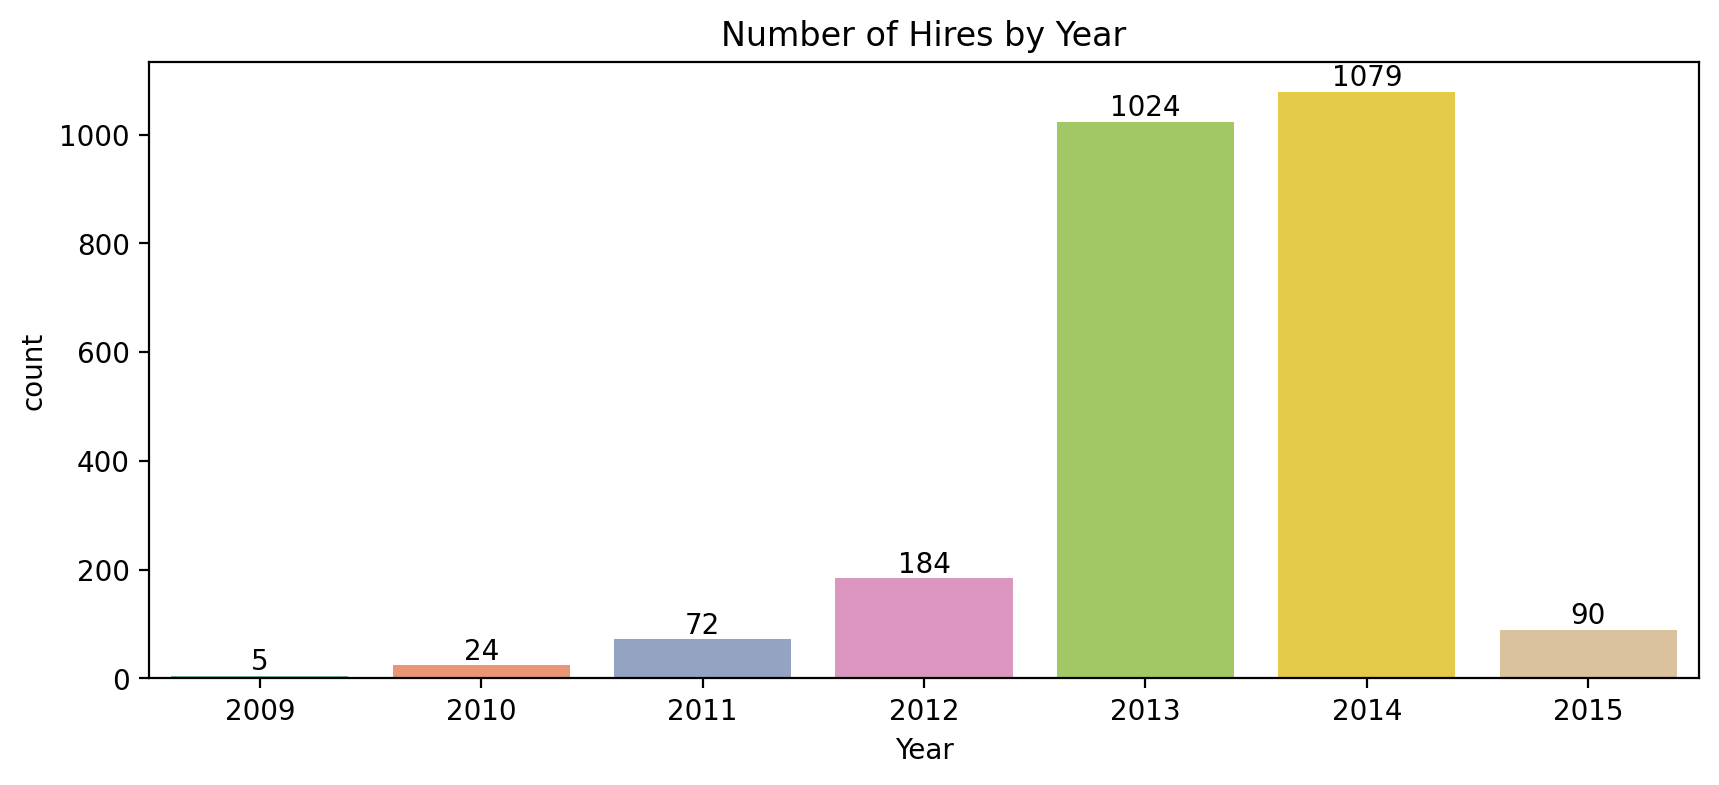

In [84]:
plt.figure(figsize=(10,4),dpi=200)
ax = sns.countplot(x='join_year',data=df)
for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Number of Hires by Year')
plt.xlabel('Year')

Text(95.72222222222221, 0.5, 'Salary')

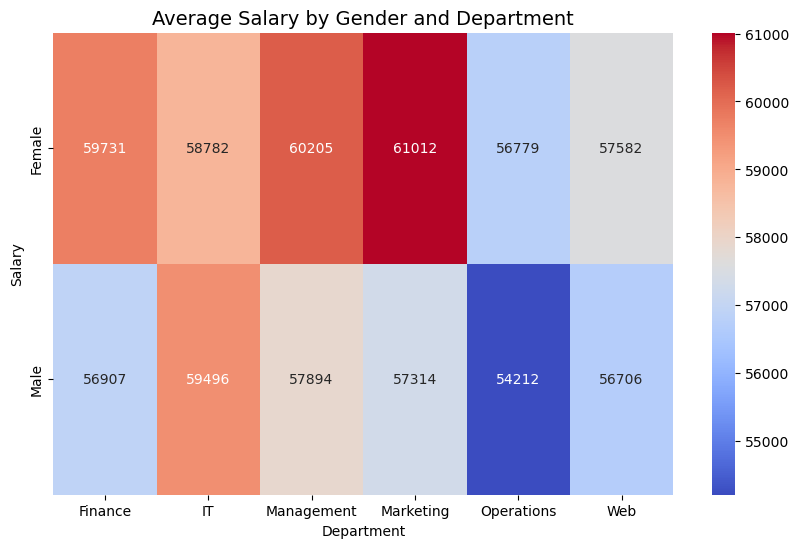

In [100]:
pivot_table = df.pivot_table(values='salary', index='gender', columns='department', aggfunc='mean').round()

plt.figure(figsize=(10, 6))
ax = sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='g')
ax.set_facecolor('lightgrey') 
plt.title('Average Salary by Gender and Department', fontsize=14)
plt.xlabel('Department', fontsize=10)
plt.ylabel('Salary', fontsize=10)

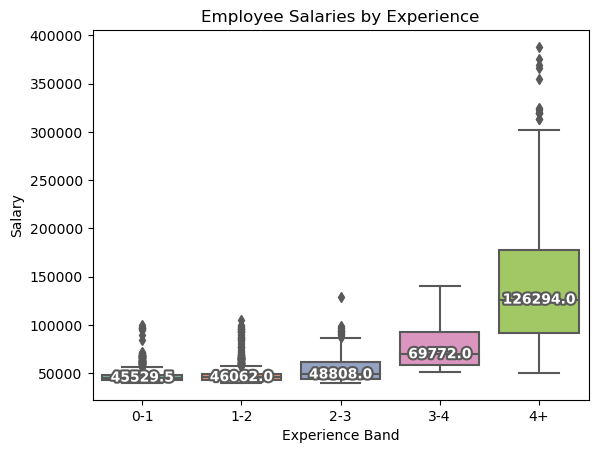

In [86]:
ax = sns.boxplot(x='Exp_Band',y='salary',data = df)
add_median_labels(ax)
plt.title('Employee Salaries by Experience')
plt.xlabel('Experience Band')
plt.ylabel('Salary')
plt.show()

In [87]:
zero_one = df.loc[df.Exp_Band == '0-1']['salary']
one_two = df.loc[df.Exp_Band == '1-2']['salary']
two_three = df.loc[df.Exp_Band == '2-3']['salary']
three_four = df.loc[df.Exp_Band == '3-4']['salary']
four_plus = df.loc[df.Exp_Band == '4+']['salary']

anova = stats.f_oneway(zero_one,one_two,two_three,three_four,four_plus)

result = pairwise_tukeyhsd(endog = df['salary'], groups = df['Exp_Band'], alpha = 0.05)
print(result)
print(anova)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   0-1    1-2  1776.0452 0.4664 -1164.9326  4717.0231  False
   0-1    2-3  8749.6586 0.0002  3198.0593  14301.258   True
   0-1    3-4 32655.4887    0.0 23401.7513 41909.2262   True
   0-1     4+  94766.035    0.0 90235.1262 99296.9438   True
   1-2    2-3  6973.6134 0.0078  1260.4271 12686.7997   True
   1-2    3-4 30879.4435    0.0 21527.8714 40231.0155   True
   1-2     4+ 92989.9898    0.0  88262.477 97717.5026   True
   2-3    3-4 23905.8301    0.0 13435.7391  34375.921   True
   2-3     4+ 86016.3764    0.0 79344.0243 92688.7284   True
   3-4     4+ 62110.5463    0.0 52144.0181 72077.0745   True
------------------------------------------------------------
F_onewayResult(statistic=871.0172400814961, pvalue=0.0)


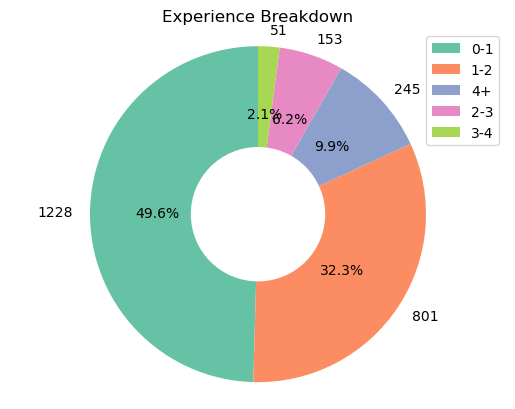

In [88]:
fig, ax = plt.subplots()
d = df["Exp_Band"].value_counts()
ax.pie(d,autopct='%1.1f%%', startangle=90,labels=d.values)
ax.legend(d.index)
ax.set_title("Experience Breakdown")
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal');

In [89]:
df.drop(['first_name','last_name','join_year','join_month'], axis = 1, inplace = True)

In [90]:
df

,join_date,todays_date,job_title,age,salary,department,leaves_used,leaves_remaining,ratings,past_experience,fullname,tenure,gender,Age_Band,Exp_Band
0,2014-05-18,2016-01-07,Analyst,21.000000,44570,Finance,24.0,6.0,2.0,0,"Tomasa, Armen",1.0,Female,21-24,0-1
1,2015-12-31,2016-01-07,Associate,29.851852,89207,Web,17.0,13.0,0.0,7,"Annie, NULL",0.0,Female,24-30,4+
2,2014-07-28,2016-01-07,Analyst,21.000000,40955,Finance,23.0,7.0,3.0,0,"Olive, Ancy",1.0,Female,21-24,0-1
3,2013-04-03,2016-01-07,Analyst,22.000000,45550,IT,22.0,8.0,3.0,0,"Cherry, Aquilar",2.0,Female,21-24,0-1
4,2014-11-20,2016-01-07,Analyst,23.065476,43161,Operations,27.0,3.0,0.0,3,"Leon, Aboulahoud",1.0,Male,21-24,2-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,2011-06-28,2016-01-07,Senior Manager,36.000000,185977,Management,15.0,15.0,5.0,10,"Katherine, Alsdon",4.0,Female,30+,4+
2635,2014-01-14,2016-01-07,Analyst,23.000000,45758,IT,17.0,13.0,2.0,0,"Louise, Altaras",1.0,Female,21-24,0-1
2636,2014-01-23,2016-01-07,Analyst,21.000000,47315,Web,29.0,1.0,5.0,0,"Renee, Alvino",1.0,Female,21-24,0-1
2637,2014-03-17,2016-01-07,Analyst,24.000000,45172,Web,23.0,7.0,3.0,1,"Teri, Anastasio",1.0,Female,21-24,1-2


In [91]:
df = df[['fullname', 'join_date', 'todays_date', 'job_title','department', 'age','gender','salary','past_experience',
        'ratings','leaves_used','leaves_remaining','tenure','Age_Band','Exp_Band']]

In [92]:
df

,fullname,join_date,todays_date,job_title,department,age,gender,salary,past_experience,ratings,leaves_used,leaves_remaining,tenure,Age_Band,Exp_Band
0,"Tomasa, Armen",2014-05-18,2016-01-07,Analyst,Finance,21.000000,Female,44570,0,2.0,24.0,6.0,1.0,21-24,0-1
1,"Annie, NULL",2015-12-31,2016-01-07,Associate,Web,29.851852,Female,89207,7,0.0,17.0,13.0,0.0,24-30,4+
2,"Olive, Ancy",2014-07-28,2016-01-07,Analyst,Finance,21.000000,Female,40955,0,3.0,23.0,7.0,1.0,21-24,0-1
3,"Cherry, Aquilar",2013-04-03,2016-01-07,Analyst,IT,22.000000,Female,45550,0,3.0,22.0,8.0,2.0,21-24,0-1
4,"Leon, Aboulahoud",2014-11-20,2016-01-07,Analyst,Operations,23.065476,Male,43161,3,0.0,27.0,3.0,1.0,21-24,2-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,"Katherine, Alsdon",2011-06-28,2016-01-07,Senior Manager,Management,36.000000,Female,185977,10,5.0,15.0,15.0,4.0,30+,4+
2635,"Louise, Altaras",2014-01-14,2016-01-07,Analyst,IT,23.000000,Female,45758,0,2.0,17.0,13.0,1.0,21-24,0-1
2636,"Renee, Alvino",2014-01-23,2016-01-07,Analyst,Web,21.000000,Female,47315,0,5.0,29.0,1.0,1.0,21-24,0-1
2637,"Teri, Anastasio",2014-03-17,2016-01-07,Analyst,Web,24.000000,Female,45172,1,3.0,23.0,7.0,1.0,21-24,1-2


In [93]:
#import clean data into SQL

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2478 entries, 0 to 2638
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fullname          2478 non-null   object        
 1   join_date         2478 non-null   datetime64[ns]
 2   todays_date       2478 non-null   datetime64[ns]
 3   job_title         2478 non-null   object        
 4   department        2478 non-null   object        
 5   age               2478 non-null   float64       
 6   gender            2478 non-null   object        
 7   salary            2478 non-null   int64         
 8   past_experience   2478 non-null   int64         
 9   ratings           2478 non-null   float64       
 10  leaves_used       2478 non-null   float64       
 11  leaves_remaining  2478 non-null   float64       
 12  tenure            2478 non-null   float64       
 13  Age_Band          2478 non-null   category      
 14  Exp_Band          2478 n

In [95]:
import psycopg2


# Connect to PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="CS623",
    user="postgres",
    password="CSDBMS623")


# Create a cursor object
cur = conn.cursor()

# Create table if it doesn't exist
cur.execute("""
    CREATE TABLE IF NOT EXISTS tbl_employees (
        fullname TEXT PRIMARY KEY,
        join_date TIMESTAMP,
        todays_date TIMESTAMP,
        job_title VARCHAR(50),
        department VARCHAR(50),
        age DOUBLE PRECISION,
        gender VARCHAR(50),
        salary DOUBLE PRECISION,
        past_experience DOUBLE PRECISION,
        ratings DOUBLE PRECISION,
        leaves_used DOUBLE PRECISION,
        leaves_remaining DOUBLE PRECISION,
        tenure DOUBLE PRECISION,
        Age_Band VARCHAR(10),
        Exp_Band VARCHAR(10)
        
        
        
    );
""")

# Insert data from DataFrame to table
for _, row in df.iterrows():
    cur.execute("INSERT INTO tbl_employees (fullname,join_date,todays_date,job_title,department,age,gender,salary,past_experience,ratings,leaves_used,leaves_remaining,tenure,Age_Band,Exp_Band) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", (row['fullname'], row['join_date'],row['todays_date'],row['job_title'],row['department'],row['age'],row['gender'],row['salary'],row['past_experience'],row['ratings'],row['leaves_used'],row['leaves_remaining'],row['tenure'],row['Age_Band'],row['Exp_Band']))

# Commit the changes
conn.commit()

# Close the connection
cur.close()
conn.close()

In [96]:
# get the distinct employees who have a salary of greater than 180000

from psycopg2 import sql

with psycopg2.connect(
     host="localhost",
    database="CS623",
    user="postgres",
    password="CSDBMS623") as con: 

    cursor = con.cursor()

    query = sql.SQL( """""""""SELECT  department, COUNT(DISTINCT fullname) as "emp_count" FROM tbl_employees
                              WHERE salary > 180000
                             GROUP BY department ORDER BY 2 DESC """"""""")
    cursor.execute(query)
    
    data = cursor.fetchall()
    
query_one = pd.DataFrame(data, columns = ['department','emp_count'])

query_one
    

,department,emp_count
0,IT,14
1,Finance,10
2,Management,10
3,Marketing,9
4,Web,8
5,Operations,7


In [97]:
#get the top 10 analyst employees in the finance department who have higher salaries than the average for their department role

query = sql.SQL( """""""""WITH salary_avgs AS(
                          SELECT *,AVG(salary) OVER (PARTITION BY job_title, department) AS "avg_salary" FROM tbl_employees)
                          SELECT fullname, department, job_title,salary,salary - avg_salary as "difference" FROM salary_avgs
                          WHERE salary > avg_salary AND department = 'Finance' and job_title = 'Analyst'
                          ORDER BY 5 DESC
                          LIMIT 10
                         """"""""")
cursor.execute(query)
    
data = cursor.fetchall()
    
query_two = pd.DataFrame(data, columns = ['full_name','department','job_title','salary','difference'])

query_two

,full_name,department,job_title,salary,difference
0,"Sidney, Acken",Finance,Analyst,49953.0,4991.36
1,"Natalia, April",Finance,Analyst,49949.0,4987.36
2,"Collin, Akerley",Finance,Analyst,49905.0,4943.36
3,"Frances, Alquesta",Finance,Analyst,49892.0,4930.36
4,"Nancy, Almquist",Finance,Analyst,49868.0,4906.36
5,"Vernice, Ariaza",Finance,Analyst,49830.0,4868.36
6,"Donna, Alnoor",Finance,Analyst,49785.0,4823.36
7,"Tommie, Afflick",Finance,Analyst,49752.0,4790.36
8,"Dolly, Anne",Finance,Analyst,49725.0,4763.36
9,"Mariana, Arabia",Finance,Analyst,49662.0,4700.36


In [98]:
#get the count of employees and average salary by department for those that joined in 2014
query = sql.SQL( """""""""SELECT department,COUNT(DISTINCT fullname) as "emp_count", AVG(salary) as "avg_salary" FROM tbl_employees
                           WHERE join_date BETWEEN '2014-01-01' AND '2014-12-31'
                           GROUP BY department
                         """"""""")
cursor.execute(query)
    
data = cursor.fetchall()
    
query_three = pd.DataFrame(data, columns = ['department','emp_count','avg_salary'])

query_three

,department,emp_count,avg_salary
0,Finance,167,49284.682635
1,IT,215,54195.423256
2,Management,175,51788.834286
3,Marketing,164,50949.006098
4,Operations,189,50754.105820
5,Web,169,50779.928994


In [99]:
#get the count of employees by gender and department whos past experience and salaries are greater than the average for their job titles and department and joined in 2014
query = sql.SQL( """""""""WITH base_avgs AS(
                           SELECT *,AVG(salary) OVER (PARTITION BY job_title, department) AS "avg_salary",
                                    AVG(past_experience) OVER (PARTITION BY job_title, department) AS "avg_exp"
                         FROM tbl_employees)
                         SELECT department,gender, COUNT(DISTINCT fullname) as "emp_count", AVG(salary) as "avg_salary" FROM base_avgs
                         WHERE salary > avg_salary AND past_experience > avg_exp AND join_date > '2014-01-01'
                        GROUP BY department,gender
                         ORDER BY 4 DESC
                         """"""""")
cursor.execute(query)
    
data = cursor.fetchall()
    
query_four = pd.DataFrame(data, columns = ['department','gender','emp_count','avg_salary'])

query_four

,department,gender,emp_count,avg_salary
0,Marketing,Female,23,67812.260870
1,Web,Male,24,66624.958333
2,Operations,Male,26,66144.346154
3,Web,Female,33,61186.727273
4,IT,Male,29,60005.896552
5,IT,Female,28,58243.321429
6,Finance,Female,29,57125.137931
7,Operations,Female,29,56940.724138
8,Management,Female,31,56722.225806
9,Management,Male,23,55708.217391


In [101]:
#base features for modeling
query = sql.SQL( """""""""  WITH base_features AS (
                      SELECT job_title, department, age,gender, past_experience, salary FROM tbl_employees)
                      SELECT * FROM base_features
                         """"""""")
cursor.execute(query)
    
data = cursor.fetchall()
    
base_features = pd.DataFrame(data, columns = ['job_title','department','age','gender','past_experience','salary'])

base_features

,job_title,department,age,gender,past_experience,salary
0,Analyst,Finance,21.000000,Female,0.0,44570.0
1,Associate,Web,29.851852,Female,7.0,89207.0
2,Analyst,Finance,21.000000,Female,0.0,40955.0
3,Analyst,IT,22.000000,Female,0.0,45550.0
4,Analyst,Operations,23.065476,Male,3.0,43161.0
...,...,...,...,...,...,...
2473,Senior Manager,Management,36.000000,Female,10.0,185977.0
2474,Analyst,IT,23.000000,Female,0.0,45758.0
2475,Analyst,Web,21.000000,Female,0.0,47315.0
2476,Analyst,Web,24.000000,Female,1.0,45172.0


In [105]:
base_features = pd.get_dummies(base_features,drop_first=True)
X = base_features.drop(['salary'],axis=1)
y = base_features['salary']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    MAE = mean_absolute_error(y_test,preds)
    MSE = mean_squared_error(y_test,preds)
    RMSE = np.sqrt(mean_squared_error(y_test,preds))
    
    test_res = y_test - preds
    
    sns.displot(test_res,bins=25,kde=True)
    
    fig, ax = plt.subplots(figsize=(6,8),dpi=100)
    _ = sp.stats.probplot(test_res,plot=ax)
    
    
    
    print(f'MAE : {MAE}')
    print(f'MSE : {MSE}')
    print(f'RMSE : {RMSE}')

MAE : 3670.454598719517
MSE : 30987653.711006563
RMSE : 5566.655522933547


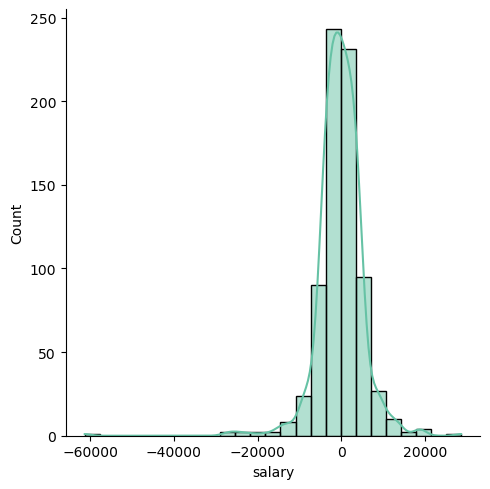

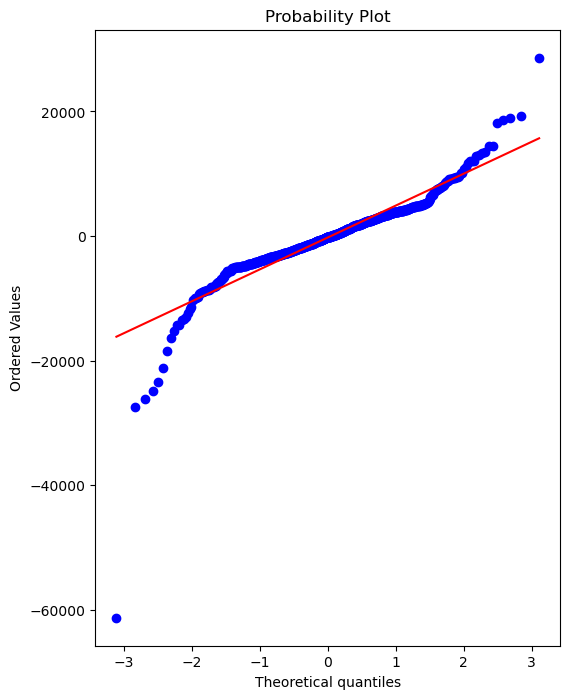

In [136]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [137]:
base_features['salary'].mean()

58076.23527037934

In [138]:
final_model = LinearRegression()

In [139]:
final_model.fit(X,y)

LinearRegression()

In [140]:
X

,age,past_experience,job_title_Associate,job_title_Director,job_title_Manager,job_title_Senior Analyst,job_title_Senior Manager,department_IT,department_Management,department_Marketing,department_Operations,department_Web,gender_Male
0,21.000000,0.0,0,0,0,0,0,0,0,0,0,0,0
1,29.851852,7.0,1,0,0,0,0,0,0,0,0,1,0
2,21.000000,0.0,0,0,0,0,0,0,0,0,0,0,0
3,22.000000,0.0,0,0,0,0,0,1,0,0,0,0,0
4,23.065476,3.0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,36.000000,10.0,0,0,0,0,1,0,1,0,0,0,0
2474,23.000000,0.0,0,0,0,0,0,1,0,0,0,0,0
2475,21.000000,0.0,0,0,0,0,0,0,0,0,0,1,0
2476,24.000000,1.0,0,0,0,0,0,0,0,0,0,1,0


In [142]:
from joblib import dump, load

In [143]:
dump(final_model, 'salaries_model.joblib') 

['salaries_model.joblib']

In [144]:
loaded_model = load('salaries_model.joblib')

In [148]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477
age,21.0,29.851852,21.0,22.0,23.065476,22.0,22.0,22.945513,28.0,22.0,...,21.0,25.0,24.0,25.0,24.0,36.0,23.0,21.0,24.0,24.0
past_experience,0.0,7.000000,0.0,0.0,3.000000,0.0,0.0,2.000000,1.0,0.0,...,0.0,2.0,0.0,1.0,2.0,10.0,0.0,0.0,1.0,2.0
job_title_Associate,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_title_Director,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_title_Manager,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_title_Senior Analyst,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_title_Senior Manager,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
department_IT,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
department_Management,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
department_Marketing,0.0,0.000000,0.0,0.0,0.000000,1.0,1.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [149]:
test_emp = [[37,10,0,0,0,0,1,1,0,0,0,0,1]]

In [150]:
loaded_model.predict(test_emp)

array([177978.39305164])

In [156]:
df.loc[(df.age == 37) & (df.department == 'IT') & (df.gender == 'Male')].salary.mean()

180046.75